In [1]:
from body_matrix import infer
from body_matrix import load
from body_matrix import process
from body_matrix import measure
from body_matrix import draw

video, frame_counts, fps, sample_frame = load.video(
    "/Users/troydo42/Desktop/Raw_Vids/VID_20230106_180916~4.mp4",
    -90, 
    21
)


keypoints_model, keypoints_transform = load.keypoints_model("cpu")
selected_box, keypoints = infer.detect_main_target(
	sample_frame, "cpu", 0.85, keypoints_model, keypoints_transform
)


segment_model, segment_transform = load.segment_model("cpu")
mask, mask_image, bool_mask = infer.segment_selected_target(
	sample_frame, "cpu", selected_box, 0.99, segment_model, segment_transform
)


selected_kps = process.keypoints_filter(
    ['left_hip', 'right_hip', 'left_wrist', 'right_wrist'], 
    keypoints
)


segment_area = process.segmentation_area(
    sample_frame, 
    bool_mask
)

Found  1  person in the frame
Distances:  [45.52442932128906]
Areas:  [103426.03324943595]
FOCUSES:  [2271.879841030094]
Select keypoint index 0
Found  1  person in the frame
[393.7584533691406, 715.6697387695312, 605.4283447265625, 1239.2049560546875]
[393.2973937988281, 717.0647583007812, 603.6537475585938, 1208.7353515625]
[14.580206203121712]
14.580206203121712 0
tensor([ 715,  715,  715,  ..., 1235, 1236, 1236]) tensor([505, 506, 507,  ..., 552, 548, 549])


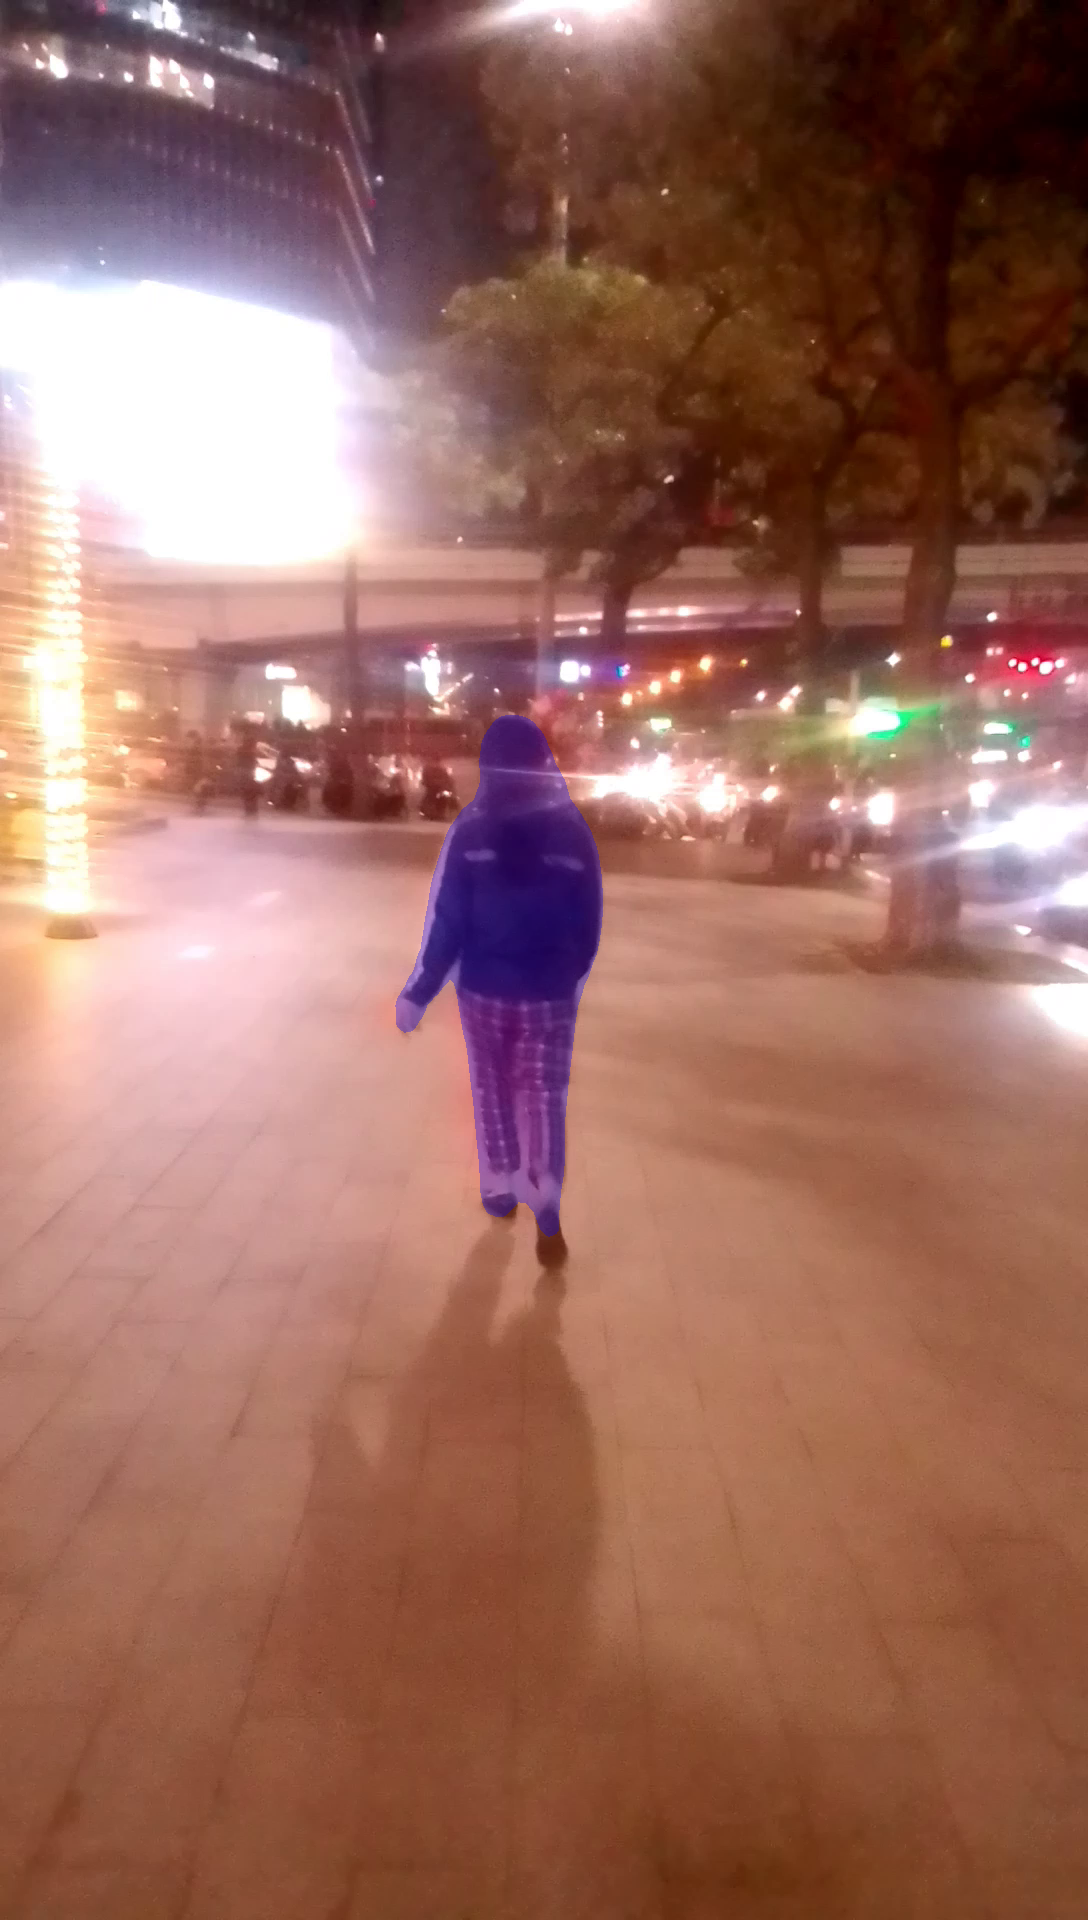

In [2]:
from torchvision.transforms.functional import pil_to_tensor, to_pil_image
from torchvision.utils import draw_segmentation_masks

segment_tensor_image = pil_to_tensor(sample_frame)
segment_mask_image = draw_segmentation_masks(
    segment_tensor_image, 
    bool_mask, 
    alpha=0.3, 
    colors=["blue"]    
)

segment_image = to_pil_image(segment_mask_image)
segment_image

In [3]:
selected_kps

{'left_wrist': [422.833740234375, 988.05859375],
 'right_wrist': [421.3929443359375, 989.4962768554688],
 'left_hip': [483.3471984863281, 980.8704223632812],
 'right_hip': [483.3471984863281, 986.6209716796875]}

left_wrist [422.833740234375, 988.05859375]
right_wrist [421.3929443359375, 989.4962768554688]
left_hip [483.3471984863281, 980.8704223632812]
right_hip [483.3471984863281, 986.6209716796875]


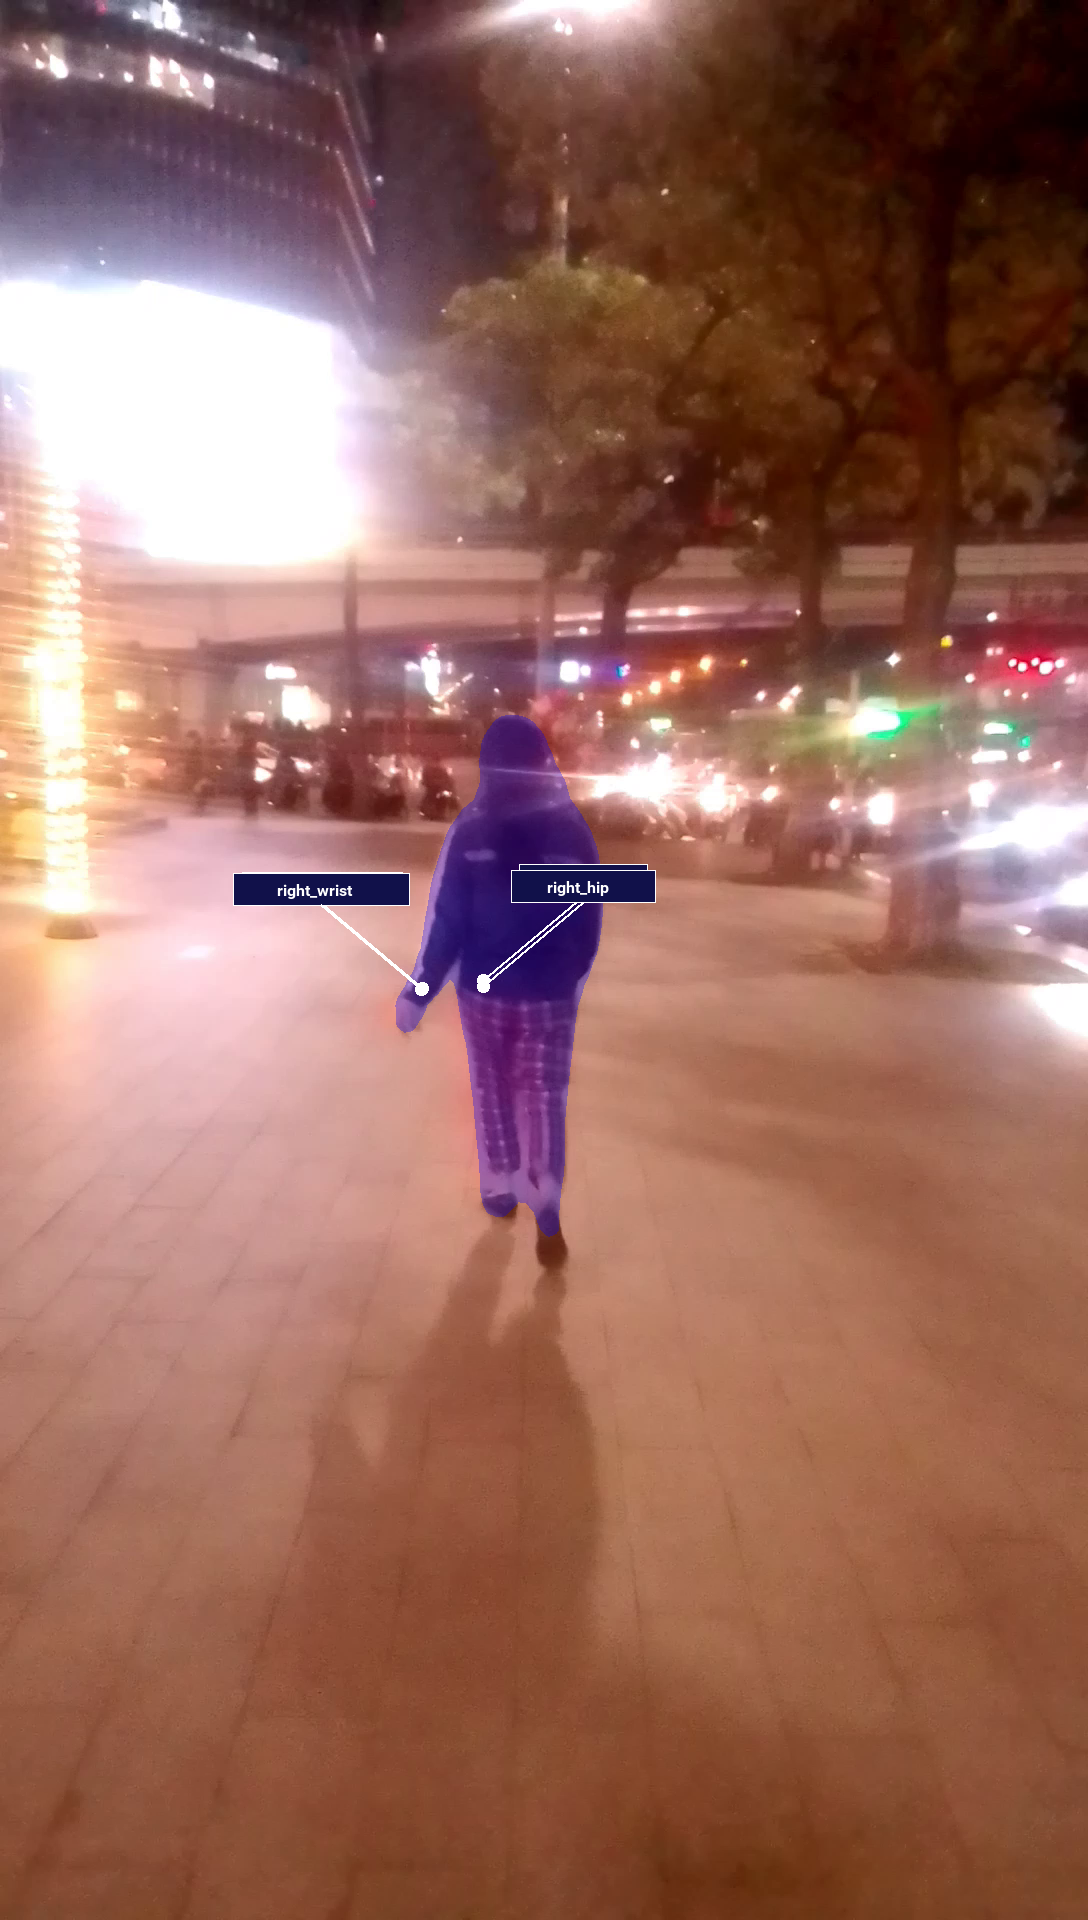

In [4]:
float_selected_frame = segment_image
middle_hip = measure.find_middle_point(
    selected_kps['left_hip'], 
    selected_kps['right_hip']
)

for key, value in selected_kps.items():
    print(key, value)
    
    float_selected_frame = draw.floating_rectangle_label(
        image = float_selected_frame, 
        longitude_coordinate = middle_hip[0], 
        point=value, 
        label_text=key, 
        label_size=16, 
        label_color="#ffffff", 
        label_font="/Users/troydo42/Desktop/Body_Matrixes/Roboto-Bold.ttf",
        background_color="#11114A"
    )
    
float_selected_frame

In [8]:
hip_kps = process.find_hip_points(
    selected_kps['left_hip'],
    selected_kps['right_hip'], 
    selected_kps['left_wrist'], 
    selected_kps['right_wrist'], 
    segment_area
)

print(hip_kps)

None


In [ ]:
from body_matrix import measure
from body_matrix import draw

float_labeled_frame = segment_image
for key, value in hip_kps.items():
    print(key, value)
    float_labeled_frame = draw.floating_rectangle_label(
        image = float_labeled_frame, 
        longitude_coordinate = middle_hip[0], 
        point=value, 
        label_text=key, 
        label_size=16, 
        label_color="#ffffff", 
        label_font="/Users/troydo42/Desktop/Body_Matrixes/Roboto-Bold.ttf",
        background_color="#11114A"
    )    
        
        
float_labeled_frame 

In [ ]:
contours = process.segmentation_contour(
    sample_frame, 
    bool_mask
)

In [ ]:
sorted(contours[-1])

In [ ]:
contoured_image = draw.segmentation_contour(
    contour_pixels = contours, 
    contour_color = "#ffffff",
    contour_size=2,
    font="/content/drive/MyDrive/Body_Matrix/Roboto-Bold.ttf", 
    image=sample_frame
)

contoured_image